<a href="https://colab.research.google.com/github/stealthOG/Skill_Lab/blob/main/Geometric_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geometric Operations and Other Mathematical Tools

#### Ekwe Collins Odinaka

### PIL

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

--2023-01-08 12:15:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.01s   

2023-01-08 12:15:47 (31.9 MB/s) - ‘lenna.png’ saved [473831/473831]

--2023-01-08 12:15:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-cours

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
#  let's define a helper function to plot two images side-by-side
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

Geometric transformations allow you to perform different operations like translation, i.e. to shift, reshape and rotate the image.

We can resize an image using the method resize() of PIL images, which takes the resized image's width and height as paramters.

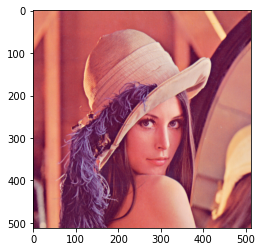

In [4]:
image = Image.open("lenna.png")
plt.imshow(image)
plt.show()

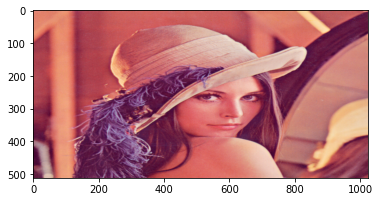

In [5]:
# we can scale the horinzontal axis by 2 and leave the vertical axis as it is using the .resize() method
width, height = image.size
new_width = 2 * width
new_hight = height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

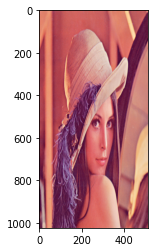

In [6]:
# do same for the vertical axis
new_width = width
new_hight = 2 * height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

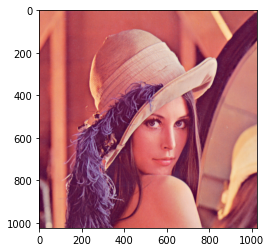

In [7]:
# do for both
new_width = 2 * width
new_hight = 2 * height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

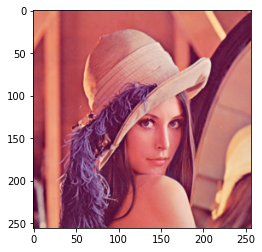

In [8]:
# can also reduce both sides
new_width = width // 2
new_hight = height // 2

new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

We can rotate an image by angle  𝜃 , using the method rotate.

We can rotate our toy image by 45 degrees:

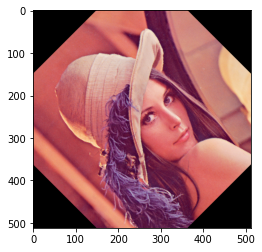

In [9]:
theta = 45
new_image = image.rotate(theta)

plt.imshow(new_image)
plt.show()

#### Mathematical Operation

##### Array Operations

We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 

Before doing that, we must first we convert the PIL image to a numpy array.


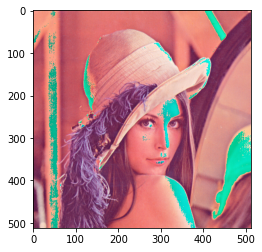

In [11]:
image = np.array(image)
# add the constant to the image array
new_image = image + 20
plt.imshow(new_image)
plt.show()

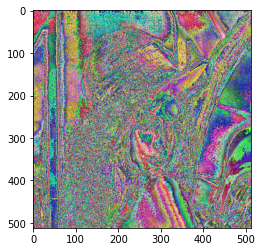

In [13]:
# multiply every pixel's intensity value by a constant value
new_image = image * 10
plt.imshow(new_image)
plt.show()

We can add the elements of two arrays of equal shape. We can generate an array of random noises with the same shape and data type as our image.

In [14]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

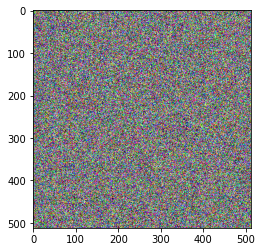

In [16]:
new_image = image + Noise

plt.imshow(Noise)
plt.show()

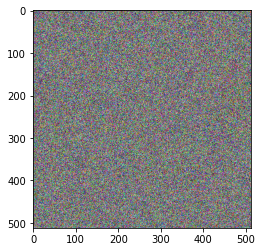

In [17]:
new_image = image*Noise

plt.imshow(new_image)
plt.show()

##### Matrix Operations

In [18]:
im_gray = Image.open("barbara.png")

In [21]:
from PIL import ImageOps 

In [22]:
im_gray = ImageOps.grayscale(im_gray)

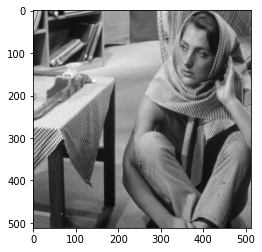

In [23]:
# convert image to array
im_gray = np.array(im_gray )

plt.imshow(im_gray,cmap='gray')
plt.show()

We can apply algorithms designed for matrices. We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.

In [24]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [25]:
s.shape

(512,)

In [26]:
# convert s to a diagonal matrix S
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

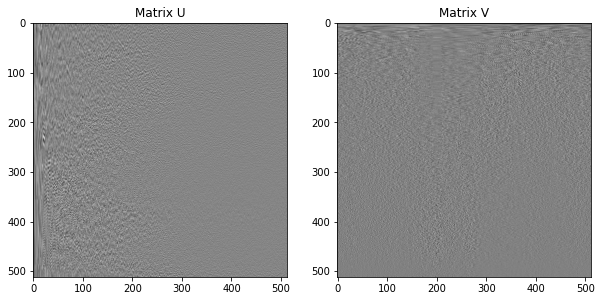

In [27]:
# plot the matrix Uand v
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

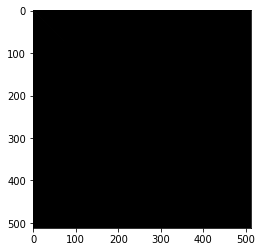

In [28]:
plt.imshow(S, cmap='gray')
plt.show()

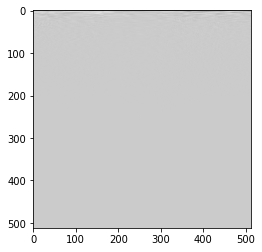

In [29]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

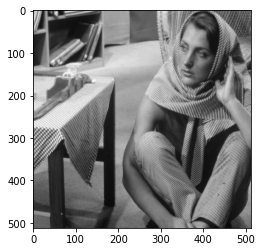

In [30]:
# he matrix product of U, S, and B
A = U.dot(B)

plt.imshow(A,cmap='gray')
plt.show()

It turns out that many elements are redundant. We can eliminate some rows and columns of S and V and approximate the image by finding the product

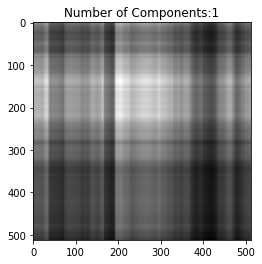

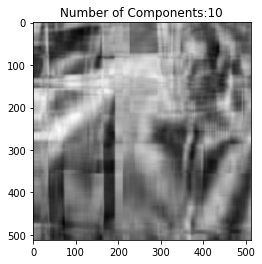

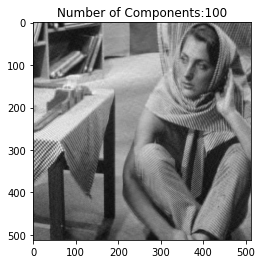

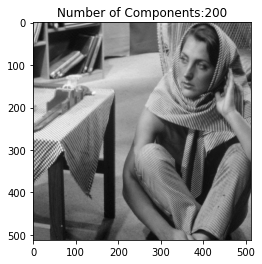

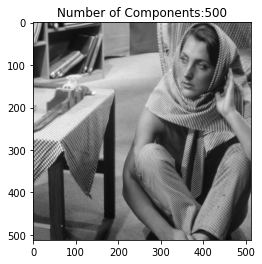

In [31]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

### Open CV

In [32]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

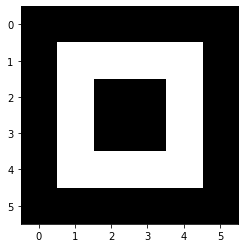

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [33]:
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

We can rescale along a specific axis:

- `fx`: scale factor along the horizontal axis  
- `fy`: scale factor along the vertical axis


The parameter interpolation estimates pixel values based on neighboring pixels. <code>INTER_NEAREST</code> uses the nearest pixel and <code>INTER_CUBIC</code> uses several pixels near the pixel value we would like to estimate.


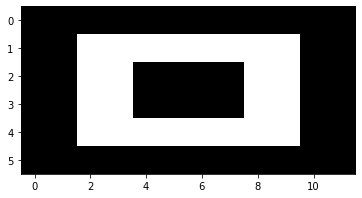

In [34]:
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()

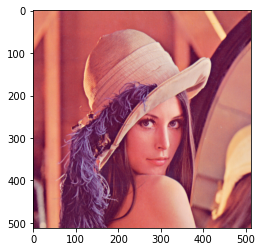

In [35]:
image = cv2.imread("lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

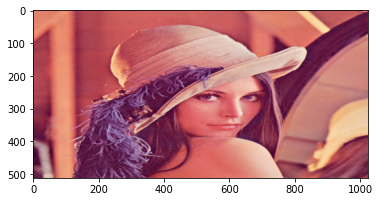

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


In [36]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

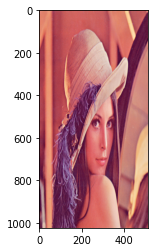

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [37]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

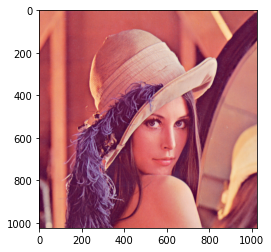

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [38]:
new_image = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

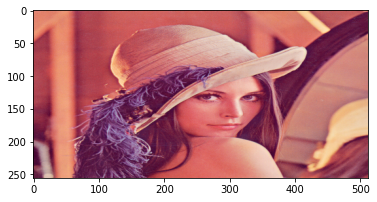

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [39]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

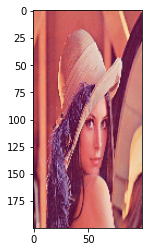

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [40]:
rows = 100
cols = 200

new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

#### Translation

Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction. You can create the transformation matrix $M$ to shift the image.

In [41]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [42]:
rows, cols, _ = image.shape

We use the function <code>warpAffine</code> from the <code>cv2</code> module. The first input parater is an image array, the second input parameter is the transformation matrix <code>M</code>, and the final input paramter is the length and width of the output image $(cols,rows)$:


In [43]:
new_image = cv2.warpAffine(image, M, (cols, rows))

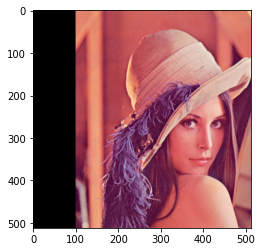

In [44]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

We can see some of the original image has been cut off. We can fix this by changing the output image size: <code>(cols + tx,rows + ty)</code>:

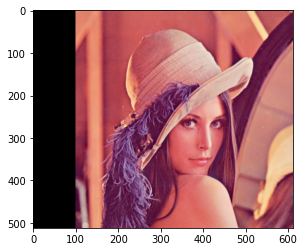

In [45]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

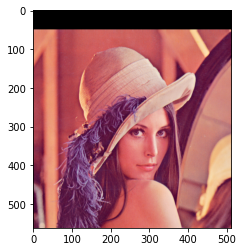

In [46]:
# shift image horinzontally
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

#### Rotation

We can rotate an image by angle θ which is achieved by the Rotation Matrix <code>getRotationMatrix2D</code>.

<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>



In [47]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

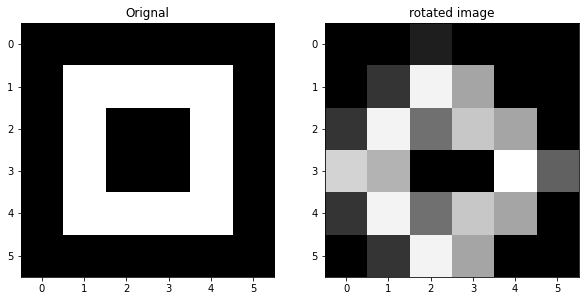

In [48]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

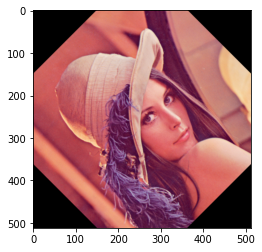

In [49]:
cols, rows, _ = image.shape

M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

#### Mathematical Operations

##### Array Operations

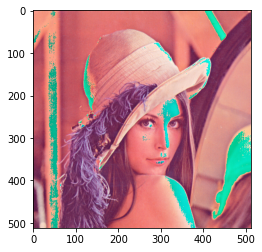

In [50]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

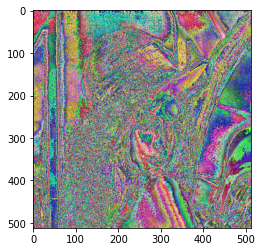

In [51]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape


(512, 512, 3)

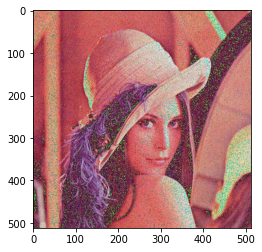

In [53]:
new_image = image + Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

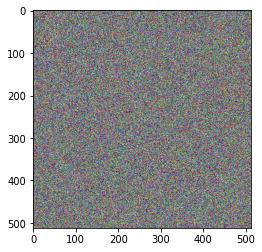

In [54]:
new_image = image*Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

##### Matrix Operations

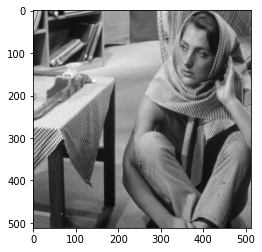

In [55]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [56]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [57]:
s.shape

(512,)

In [58]:
# convert s to a diagonal matrix S
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)


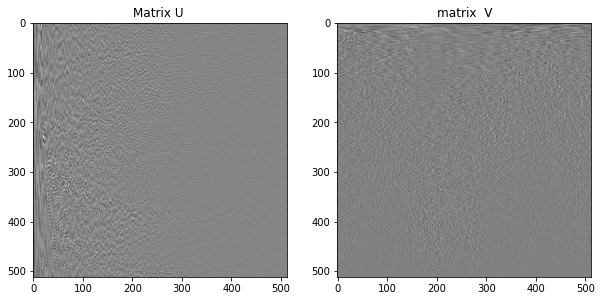

In [60]:
# plot matrix U and V
plot_image(U,V,title_1="Matrix U ",title_2="matrix  V")

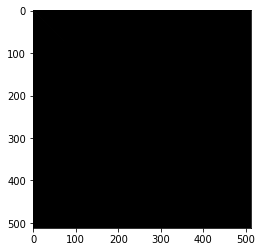

In [61]:
plt.imshow(S,cmap='gray')
plt.show()

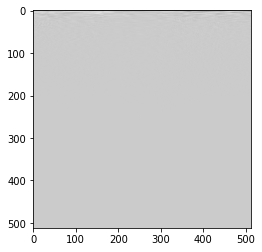

In [62]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

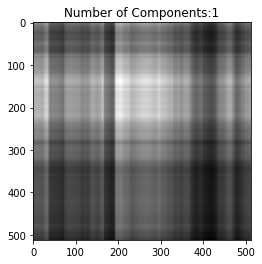

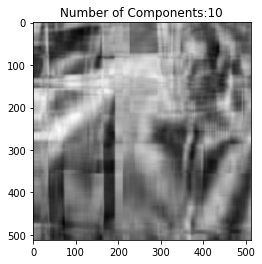

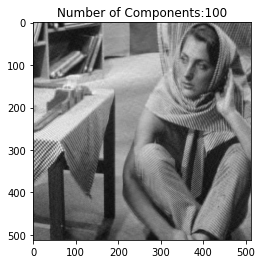

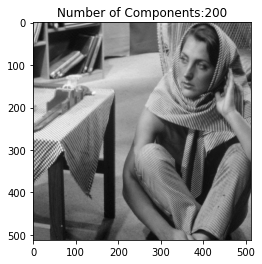

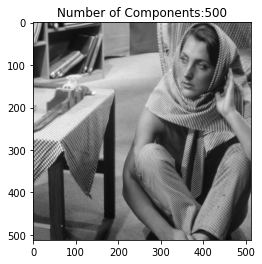

In [63]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()